In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from utils.experiments_functions import get_img_info_simple
import utils.noise_generator as noise_gen
import utils.utils as utils_functions

Import image data

In [3]:
all_images = {}

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\data\Synthetic\utils.py:38: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\data\Synthetic\utils.py:38: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


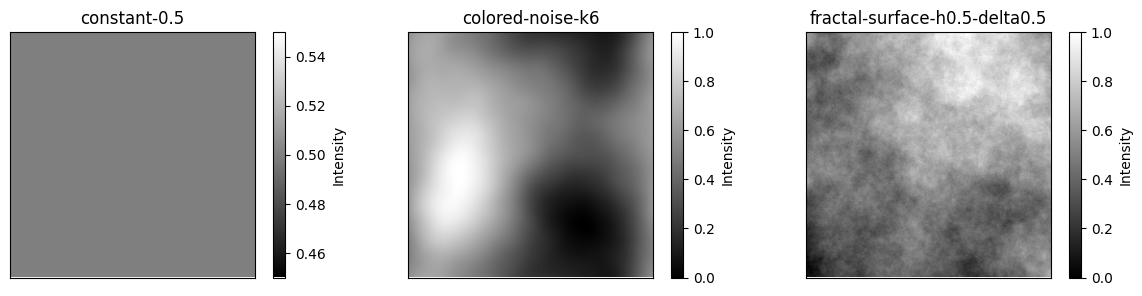

In [4]:
# Synthetic images
import data.Synthetic.images as synthetic_images

# Store the images in all_images dictionary
for item in synthetic_images.images:
    if item not in all_images:
        all_images[item] = synthetic_images.images[item]

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, item in enumerate(synthetic_images.images):
    im = axs[i].imshow(synthetic_images.images[item], cmap='gray')
    axs[i].set_title(f'{item}')
    plt.colorbar(im, ax=axs[i], label='Intensity')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

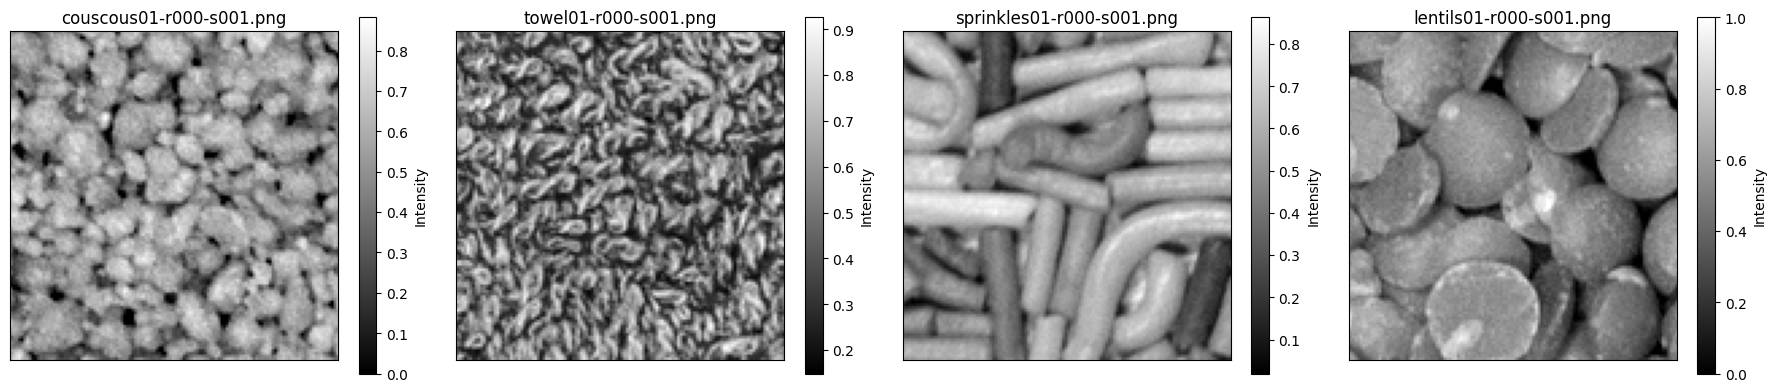

In [5]:
# Sintorn images
images_path = f'data/Sintorn/hardware'
images_filenames = chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]

# Display the images
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
for i, filename in enumerate(images_filenames):
    gs_image = cv2.imread(f'{images_path}/{filename}', cv2.IMREAD_GRAYSCALE)
    gs_image = utils_functions.normalize_uint8_to_float64(gs_image)
    
    # Adds image to the all_images dictionary
    item = filename.split('.')[0]
    if item not in all_images:
        all_images[item] = gs_image
    
    im = axs[i].imshow(gs_image, cmap='gray')
    axs[i].set_title(f'{filename}')
    plt.colorbar(im, ax=axs[i], label='Intensity')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

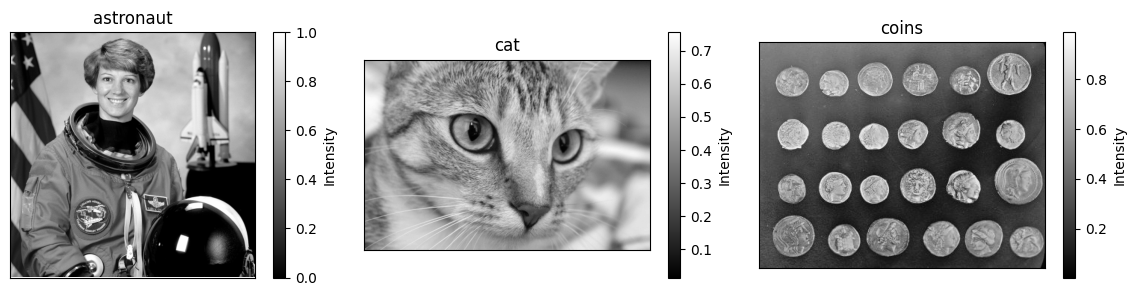

In [6]:
# Scikitlearn images
import data.Scikit.images as scikit_images

# Store the images in all_images dictionary
for item in scikit_images.images:
    if item not in all_images:
        all_images[item] = scikit_images.images[item]

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, item in enumerate(scikit_images.images):
    im = axs[i].imshow(scikit_images.images[item], cmap='gray')
    axs[i].set_title(f'{item}')
    plt.colorbar(im, ax=axs[i], label='Intensity')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

In [7]:
print(all_images.keys())

dict_keys(['constant-0.5', 'colored-noise-k6', 'fractal-surface-h0.5-delta0.5', 'couscous01-r000-s001', 'towel01-r000-s001', 'sprinkles01-r000-s001', 'lentils01-r000-s001', 'astronaut', 'cat', 'coins'])


In [8]:
# Process all images
noise_types = ['original', 'salt_and_pepper', 'speckle', 'gaussian', 'poisson']

# sets the probabilities used
noise_param_sp = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5] # salt and pepper
noise_param_gaussian = [0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ] # gaussian
noise_param_speckle = [0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ] # speckle
noise_param_poisson = [0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5,
           3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0, 30.0, 50.0] # poisson

image_data_list = []
for i, item in enumerate(all_images):
    print(f"Processing image {i+1}/{len(all_images)}: {item}")
    # get image
    gs_image = all_images[item]
    img_filename = item
    # extract metrics
    print("\tExtracting data")
    image_data = get_img_info_simple(gs_image)
    # add the information
    image_data['image_name'] = img_filename
    image_data['noise_type'] = 'original'
    image_data['noise_param'] = 0
    image_data_list.append(image_data)
    # adds no noise information to each noise_type
    for n_type in noise_types:
        if n_type != 'original':
            # adds the information
            image_data = image_data.copy()
            image_data['noise_type'] = n_type
            image_data_list.append(image_data)

    # adds s&p noise
    print("\tAdding S&P noise")
    for prob in noise_param_sp:
        print(f"\t\tProbability = {prob}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_sp_noise(gs_image, prob, prob)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'salt_and_pepper'
        noised_image_data['noise_param'] = prob
        image_data_list.append(noised_image_data)
    # adds gaussian noise
    print("\tAdding Gaussian noise")
    for param in noise_param_gaussian:
        print(f"\t\tSigma = {param}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_gaussian_noise(image=gs_image, mean=0, sigma=param)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'gaussian'
        noised_image_data['noise_param'] = param
        image_data_list.append(noised_image_data)
    # adds speckle noise
    print("\tAdding Speckle noise")
    for param in noise_param_speckle:
        print(f"\t\tSigma = {param}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_speckle_noise(gs_image, mean=0, sigma=param)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'speckle'
        noised_image_data['noise_param'] = param
        image_data_list.append(noised_image_data)
    # adds poisson noise
    print("\tAdding Poisson noise")
    for factor in noise_param_poisson:
        print(f"\t\tFactor = {factor}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_poisson_noise_normalized(gs_image, factor)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'poisson'
        noised_image_data['noise_param'] = factor
        image_data_list.append(noised_image_data)

Processing image 1/10: constant-0.5
	Extracting data
	Adding S&P noise
		Probability = 0.05
		Generating noised image
		Extracting data
		Probability = 0.1
		Generating noised image
		Extracting data
		Probability = 0.15
		Generating noised image
		Extracting data
		Probability = 0.2
		Generating noised image
		Extracting data
		Probability = 0.25
		Generating noised image
		Extracting data
		Probability = 0.3
		Generating noised image
		Extracting data
		Probability = 0.35
		Generating noised image
		Extracting data
		Probability = 0.4
		Generating noised image
		Extracting data
		Probability = 0.45
		Generating noised image
		Extracting data
		Probability = 0.5
		Generating noised image
		Extracting data
	Adding Gaussian noise
		Sigma = 0.05
		Generating noised image
		Extracting data
		Sigma = 0.1
		Generating noised image
		Extracting data
		Sigma = 0.15
		Generating noised image
		Extracting data
		Sigma = 0.2
		Generating noised image
		Extracting data
		Sigma = 0.25
		Generating

In [9]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/qualificacao_noises/all_images_data/all_images.csv", index=False)